In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("NLP").getOrCreate()

In [3]:
df = spark.read.csv("../data/raw/DataSet_Emails.csv", header=True, inferSchema=True, multiLine=True, escape='"')


In [4]:
df.count()

31716

In [5]:
df.describe().show()

+-------+-----------------+------------------+--------------------+------------------+----------+--------------------+--------------------+
|summary|              _c0|        message_id|                text|             label|label_text|             subject|             message|
+-------+-----------------+------------------+--------------------+------------------+----------+--------------------+--------------------+
|  count|            31716|             31716|               31665|             31716|     31716|               31442|               31371|
|   mean|          15857.5|16854.187539412284|                NULL|0.5096165973010468|      NULL|            386429.0|            71403.25|
| stddev|9155.764905238666| 9734.616391716854|                NULL|0.4999153936875302|      NULL|  481877.22667086066|   136659.2035841348|
|    min|                0|                 0| ( b  $ b ! zck...|                 0|       ham|                ( b| & who wants to ...|
|    max|           

In [9]:
df.select("_c0").tail(5)

[Row(_c0=31711),
 Row(_c0=31712),
 Row(_c0=31713),
 Row(_c0=31714),
 Row(_c0=31715)]

In [10]:
df = df.drop("_c0")

In [11]:
df.describe().show()

+-------+------------------+--------------------+------------------+----------+--------------------+--------------------+
|summary|        message_id|                text|             label|label_text|             subject|             message|
+-------+------------------+--------------------+------------------+----------+--------------------+--------------------+
|  count|             31716|               31665|             31716|     31716|               31442|               31371|
|   mean|16854.187539412284|                NULL|0.5096165973010468|      NULL|            386429.0|            71403.25|
| stddev| 9734.616391716854|                NULL|0.4999153936875302|      NULL|  481877.22667086066|   136659.2035841348|
|    min|                 0| ( b  $ b ! zck...|                 0|       ham|                ( b| & who wants to ...|
|    max|             33715|þquieres felicita...|                 1|      spam|þquieres felicita...|þya planeó dónde ...|
+-------+---------------

In [13]:
df.groupBy("label_text").count().show()

+----------+-----+
|label_text|count|
+----------+-----+
|       ham|15553|
|      spam|16163|
+----------+-----+



Check For duplicates


In [14]:
df.groupBy(df.columns).count().where("count > 1").show()


+----------+----+-----+----------+-------+-------+----+-----+
|message_id|text|label|label_text|subject|message|date|count|
+----------+----+-----+----------+-------+-------+----+-----+
+----------+----+-----+----------+-------+-------+----+-----+



In [15]:
df_c = df
cc = df_c.count() - df_c.dropDuplicates().count()
print(cc)


0


No duplicates found

check for null values

In [17]:
from pyspark.sql.functions import col,sum
df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns]).show()

+----------+----+-----+----------+-------+-------+----+
|message_id|text|label|label_text|subject|message|date|
+----------+----+-----+----------+-------+-------+----+
|         0|  51|    0|         0|    274|    345|   0|
+----------+----+-----+----------+-------+-------+----+



In [22]:
df.printSchema()

root
 |-- message_id: integer (nullable = true)
 |-- text: string (nullable = true)
 |-- label: integer (nullable = true)
 |-- label_text: string (nullable = true)
 |-- subject: string (nullable = true)
 |-- message: string (nullable = true)
 |-- date: date (nullable = true)



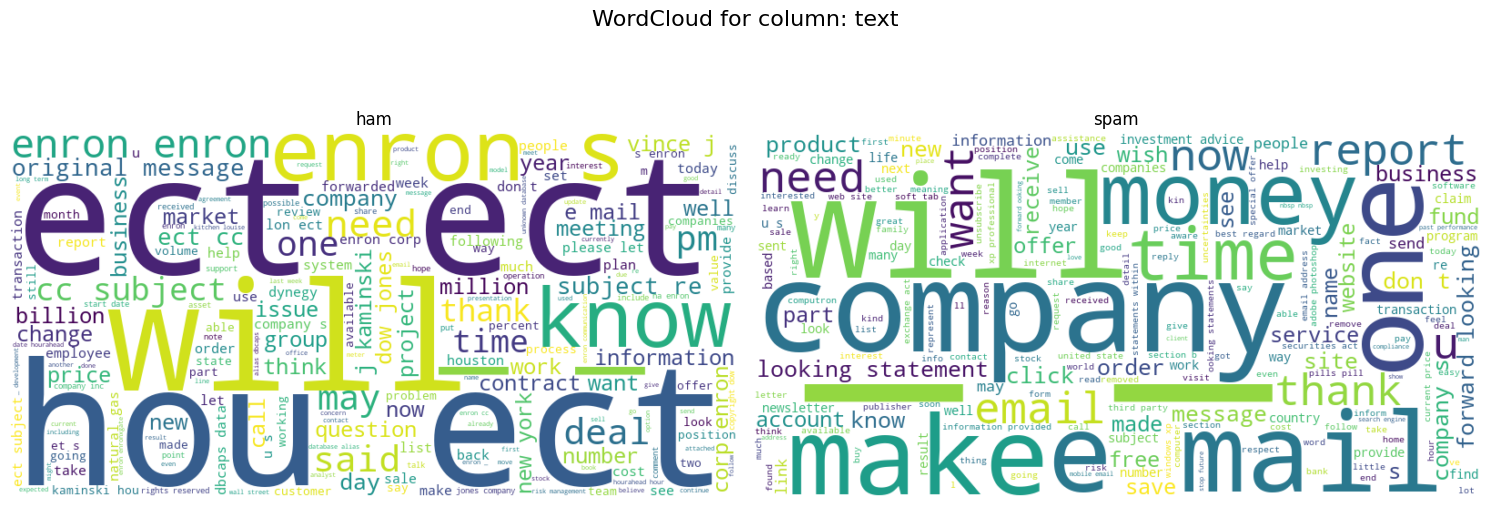

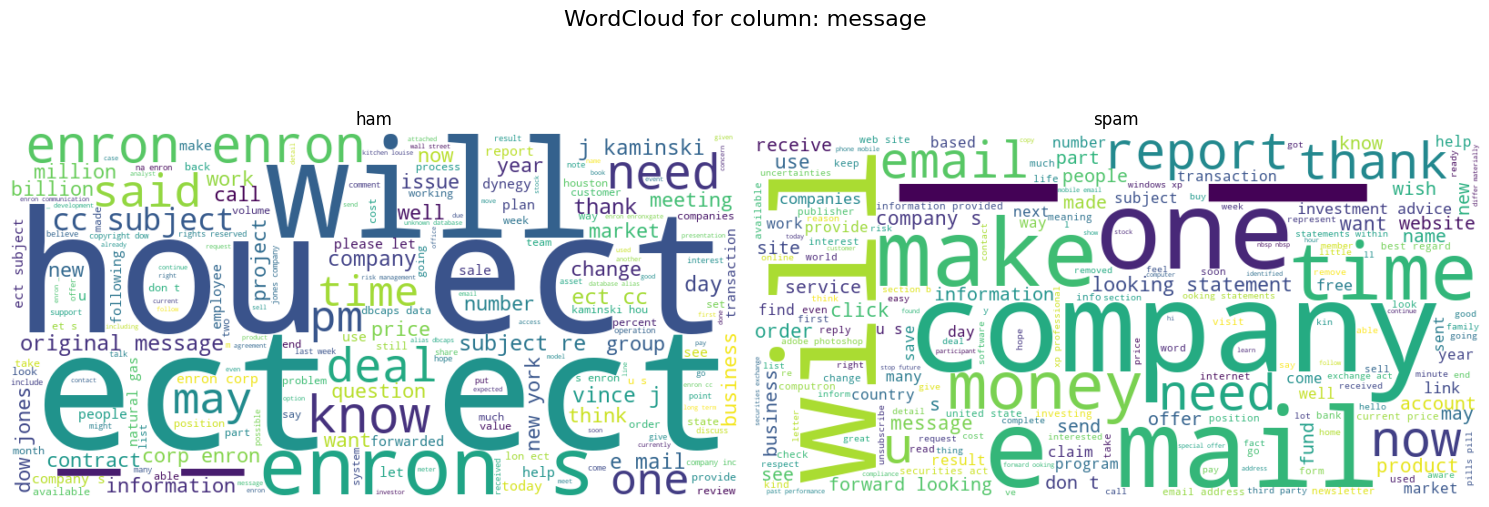

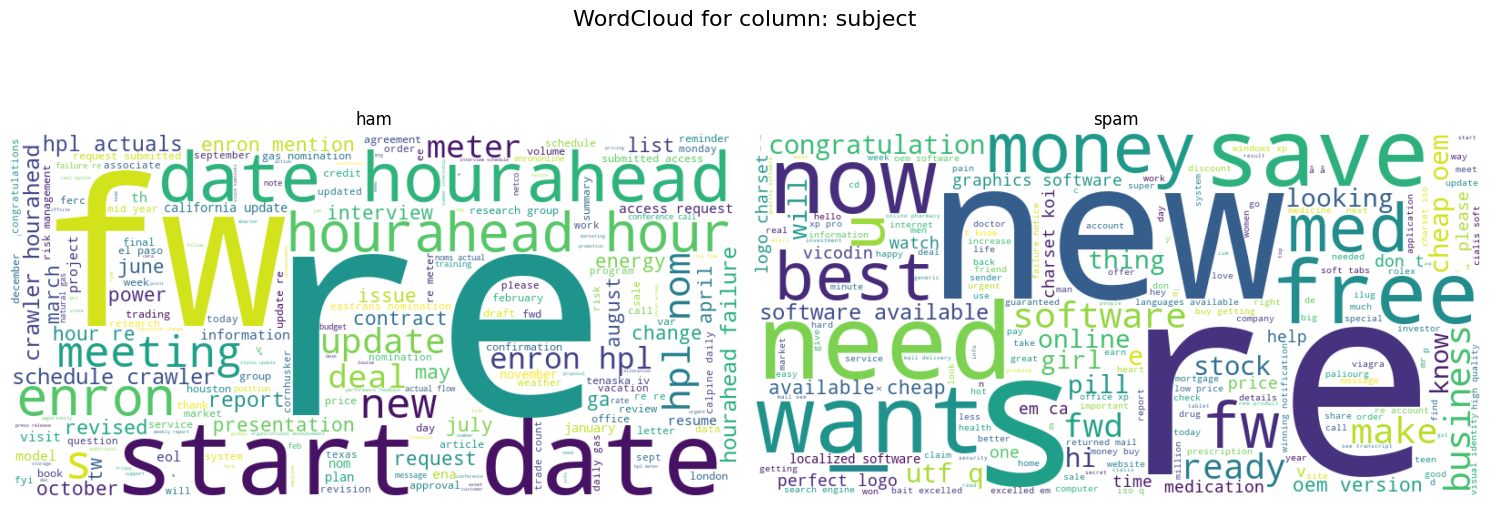

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_columns = ["text", "message", "subject"]   
label_col = "label_text"                       

labels = df.select(label_col).distinct().toPandas()[label_col].tolist()

for text_col in text_columns:
    plt.figure(figsize=(15, 6))
    plt.suptitle(f"WordCloud for column: {text_col}", fontsize=16)

    for i, label in enumerate(labels, 1):

        pdf = (
            df.filter(df[label_col] == label)
              .select(text_col)
              .toPandas()[text_col]
              .dropna()
              .astype(str)
        )

        text = " ".join(pdf)

        wc = WordCloud(width=800, height=400, background_color="white").generate(text)

        plt.subplot(1, len(labels), i)
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        plt.title(label)

    plt.tight_layout()
    plt.show()
